# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from scipy.optimize import minimize

In [2]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
names= ['MSFT','AAPL','AMZN','FB','GOOGL',
        'ABT','ACN','AIG','AMGN','CI',
        'CSCO','COST','GPS','GM','HP']
start_date='2015-01-01'

In [4]:
closes=get_adj_closes(tickers=names,start_date=start_date)
closes.head(10)

Symbols,MSFT,AAPL,AMZN,FB,GOOGL,ABT,ACN,AIG,AMGN,CI,CSCO,COST,GPS,GM,HP
Date,,,,,,,,,,,,,,,
2015-01-02,41.748566,99.945885,308.519989,78.449997,529.549988,40.149174,79.503258,49.732548,138.134781,102.669853,23.359201,124.293221,33.107903,27.594938,48.876850
2015-01-05,41.364658,97.130241,302.190002,77.190002,519.460022,40.158115,78.160896,48.748714,136.493301,100.902596,22.893879,122.880104,33.321358,27.190994,47.526821
2015-01-06,40.757530,97.139420,295.290009,76.150002,506.640015,39.702087,77.597084,48.057384,132.095840,101.301964,22.885414,124.503838,32.878643,27.602859,46.205822
2015-01-07,41.275364,98.501518,298.420013,76.150002,505.149994,40.023983,79.225830,48.287823,136.709335,103.678261,23.096928,126.671837,34.467632,28.386992,43.157368
2015-01-08,42.489609,102.286186,300.459991,78.180000,506.910004,40.846649,80.433945,48.075108,136.216873,108.960030,23.274595,127.760170,34.072372,28.672125,44.129978
2015-01-09,42.132477,102.395844,296.929993,77.739998,500.720001,40.417435,80.344460,47.259666,134.540833,107.831802,23.511484,125.794167,33.218582,28.188978,44.129978
2015-01-12,41.605709,99.872757,291.410004,76.720001,497.059998,40.757217,80.102844,46.408783,134.964111,106.014626,23.731453,125.091965,33.400402,28.386992,43.092045
2015-01-13,41.391430,100.759514,294.739990,76.449997,501.799988,40.101017,80.389198,45.974468,134.031082,106.663612,23.773760,123.836823,32.878643,27.919682,44.275143
2015-01-14,41.034302,100.375572,293.269989,76.279999,505.929993,39.804359,79.449562,45.540173,134.048386,107.272675,23.621469,122.274490,32.641491,27.167238,44.442074


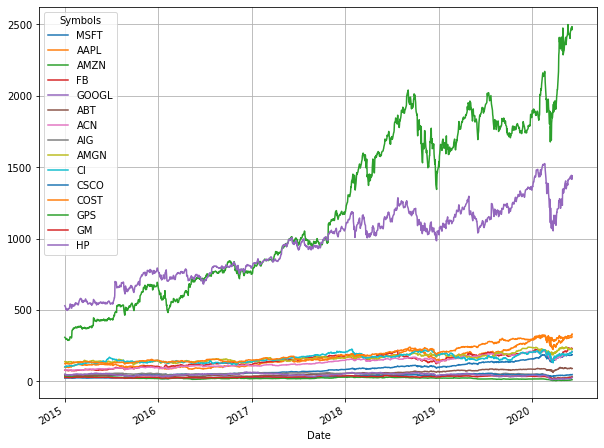

In [9]:
closes.plot(figsize=(10,8),grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [10]:
ret=((closes-closes.shift())/closes.shift()).dropna()
ret

Symbols,MSFT,AAPL,AMZN,FB,GOOGL,ABT,ACN,AIG,AMGN,CI,CSCO,COST,GPS,GM,HP
Date,,,,,,,,,,,,,,,
2015-01-05,-0.009196,-0.028172,-0.020517,-0.016061,-0.019054,0.000223,-0.016884,-0.019782,-0.011883,-0.017213,-0.019920,-0.011369,0.006447,-0.014638,-0.027621
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679,-0.011356,-0.007213,-0.014182,-0.032217,0.003958,-0.000370,0.013214,-0.013286,0.015147,-0.027795
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941,0.008108,0.020990,0.004795,0.034925,0.023458,0.009242,0.017413,0.048329,0.028408,-0.065976
2015-01-08,0.029418,0.038422,0.006836,0.026658,0.003484,0.020554,0.015249,-0.004405,-0.003602,0.050944,0.007692,0.008592,-0.011468,0.010045,0.022536
2015-01-09,-0.008405,0.001072,-0.011749,-0.005628,-0.012211,-0.010508,-0.001113,-0.016962,-0.012304,-0.010355,0.010178,-0.015388,-0.025058,-0.016851,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,-0.002292,0.012298,0.011739,0.030299,0.000942,-0.020122,0.008729,0.016301,-0.012146,0.003953,-0.031786,-0.000584,0.111236,0.040958,0.006955
2020-06-02,0.011377,0.004629,0.000554,0.003493,0.005185,-0.004193,0.011801,0.030769,-0.014058,0.016204,0.012743,-0.003892,0.076845,0.017446,0.075481
2020-06-03,0.002434,0.005505,0.002423,-0.011000,-0.002122,-0.013172,0.007289,0.055891,-0.012158,0.000248,0.001066,-0.001465,0.122066,0.060562,0.042661


In [11]:
closes.pct_change().dropna()

Symbols,MSFT,AAPL,AMZN,FB,GOOGL,ABT,ACN,AIG,AMGN,CI,CSCO,COST,GPS,GM,HP
Date,,,,,,,,,,,,,,,
2015-01-05,-0.009196,-0.028172,-0.020517,-0.016061,-0.019054,0.000223,-0.016884,-0.019782,-0.011883,-0.017213,-0.019920,-0.011369,0.006447,-0.014638,-0.027621
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679,-0.011356,-0.007213,-0.014182,-0.032217,0.003958,-0.000370,0.013214,-0.013286,0.015147,-0.027795
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941,0.008108,0.020990,0.004795,0.034925,0.023458,0.009242,0.017413,0.048329,0.028408,-0.065976
2015-01-08,0.029418,0.038422,0.006836,0.026658,0.003484,0.020554,0.015249,-0.004405,-0.003602,0.050944,0.007692,0.008592,-0.011468,0.010045,0.022536
2015-01-09,-0.008405,0.001072,-0.011749,-0.005628,-0.012211,-0.010508,-0.001113,-0.016962,-0.012304,-0.010355,0.010178,-0.015388,-0.025058,-0.016851,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,-0.002292,0.012298,0.011739,0.030299,0.000942,-0.020122,0.008729,0.016301,-0.012146,0.003953,-0.031786,-0.000584,0.111236,0.040958,0.006955
2020-06-02,0.011377,0.004629,0.000554,0.003493,0.005185,-0.004193,0.011801,0.030769,-0.014058,0.016204,0.012743,-0.003892,0.076845,0.017446,0.075481
2020-06-03,0.002434,0.005505,0.002423,-0.011000,-0.002122,-0.013172,0.007289,0.055891,-0.012158,0.000248,0.001066,-0.001465,0.122066,0.060562,0.042661


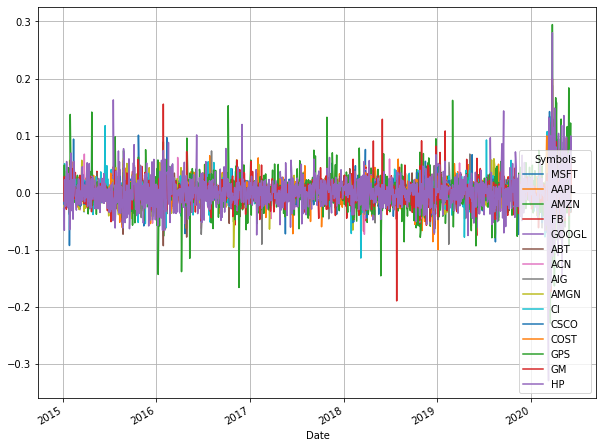

In [12]:
ret.plot(figsize=(10,8), grid=True)

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [13]:
medi_ret=ret.mean()
medi_ret

Symbols
MSFT     0.001250
AAPL     0.001040
AMZN     0.001711
FB       0.000982
GOOGL    0.000873
ABT      0.000711
ACN      0.000822
AIG     -0.000006
AMGN     0.000495
CI       0.000719
CSCO     0.000666
COST     0.000762
GPS     -0.000261
GM       0.000297
HP       0.000066
dtype: float64

In [14]:
vol=ret.std()
vol

Symbols
MSFT     0.017332
AAPL     0.017917
AMZN     0.019172
FB       0.019490
GOOGL    0.016761
ABT      0.015520
ACN      0.015219
AIG      0.020965
AMGN     0.016507
CI       0.019775
CSCO     0.016771
COST     0.013233
GPS      0.030503
GM       0.021010
HP       0.031503
dtype: float64

In [15]:
ret_summary=pd.DataFrame({'Meadia': medi_ret, 'Vol':vol})
ret_summary

,Meadia,Vol
Symbols,,
MSFT,0.001250,0.017332
AAPL,0.001040,0.017917
AMZN,0.001711,0.019172
FB,0.000982,0.019490
GOOGL,0.000873,0.016761
ABT,0.000711,0.015520
ACN,0.000822,0.015219
AIG,-0.000006,0.020965
AMGN,0.000495,0.016507


In [17]:
resumen_anual=pd.DataFrame({'Mean': medi_ret*252, 'Vol': vol*np.sqrt(252)})
resumen_anual

,Mean,Vol
Symbols,,
MSFT,0.314940,0.275129
AAPL,0.261960,0.284430
AMZN,0.431096,0.304353
FB,0.247498,0.309388
GOOGL,0.219940,0.266066
ABT,0.179206,0.246367
ACN,0.207129,0.241592
AIG,-0.001453,0.332808
AMGN,0.124851,0.262043


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (20 puntos).

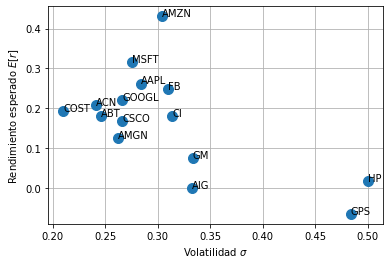

In [20]:
# Puntos a graficar
# Ventana para graficar
plt.figure(figsize=(6, 4))
# Graficar puntos
plt.plot(resumen_anual['Vol'], resumen_anual['Mean'], 'o', ms=10)
# Etiquetas de los ejes
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
# Etiqueta de cada instrumento
for i in range(len(resumen_anual)):
    plt.text(resumen_anual.iloc[i, 1], resumen_anual.iloc[i, 0], resumen_anual.index[i])
    
plt.grid()

In [21]:
# Funcion objetivo y condicion inicial
def fun_obj(beta, x, y):
    recta = beta[0] + beta[1] * x
    return ((y - recta)**2).sum()

In [22]:
# Resolver problema de optimizacion
x0 = [0, 0]

In [26]:
solucion = minimize(fun=fun_obj,
                    x0=x0,
                    args=(resumen_anual['Vol'], resumen_anual['Mean'])
                   )

beta = solucion.x
beta


array([ 0.4662828 , -0.95942778])

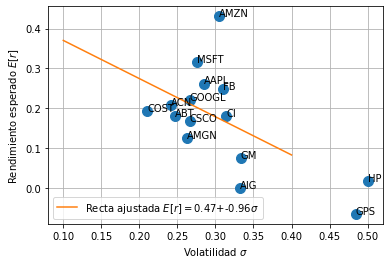

In [28]:
# Ventana para graficar
plt.figure(figsize=(6, 4))
# Graficar puntos
plt.plot(resumen_anual['Vol'], resumen_anual['Mean'], 'o', ms=10)
# Etiquetas de los ejes
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
# Etiqueta de cada instrumento
for i in range(len(resumen_anual)):
    plt.text(resumen_anual.iloc[i, 1], resumen_anual.iloc[i, 0], resumen_anual.index[i])
    
plt.grid()

# Grafica de recta ajustada
vol = np.linspace(0.1, 0.4)
plt.plot(vol, beta[0] + beta[1] * vol, 
         label=f'Recta ajustada $E[r]=${np.round(beta[0], 2)}$+${np.round(beta[1], 2)}$\sigma$')
plt.legend(loc='best')

Hasta este punto durante las clases hemos observado casos en los cuales la relación entre el rendimiento esperado y la volatilidad es positiva. Dicho de otra forma, mientras mayor sea la volatilidad de una acción esta cuenta con un riesgo u inestabilidad mayor, esto generalmente esta acompañado de forma lógica con un mayor rendimiento, al menos en teoría. Esto no se ve presente en esta gráfica y lo podemos visualizar aún mejor con la recta ajustada (tendencia negativa, hacia abajo).

Lo que nos demuestra es que en este caso específico una menor volatilidad nos da un mayor riesgo, algo que uno no pensaría que sucede en casos reales. Esto puede tener muchas posibles explicaciones. Quizá se debe a la naturaleza de las compañías en cuestión, son en su mayoría tecnológicas y parecen fuertemente exceder expectativas, esto se debe a un crecimiento que quizá no sea órganico y no demuestre el VERDADERO valor la empresa a  través del valor de sus acciones, quizá se encuentren sobrevaloradas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>